In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as sts

In [2]:
# Подключаем датафрейм
%store -r data

In [3]:
# Настраиваем offset для данных о длительности глубокого сна (мэтчим с активностью накануне)

data['deep_offset'] = data['deepSleepSeconds'].shift(-1, fill_value=0)
data['rem_offset'] = data['remSleepSeconds'].shift(-1, fill_value=0)

# currentDayRestingHeartRate - выводится именно за период сна, тоже делаем offset

data['RHR'] = data['currentDayRestingHeartRate'].shift(-1, fill_value=0)

In [4]:
# Исклчючаем наблюдения, в которых не записан глубокий и rem сон

data_cleaned = data[~(data['deep_offset'] == 0) | (data['rem_offset'] == 0)]

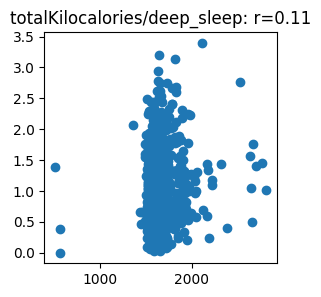

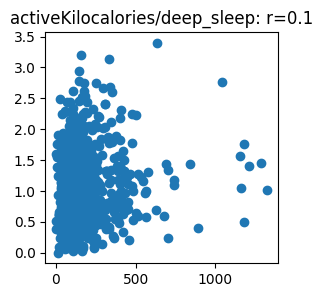

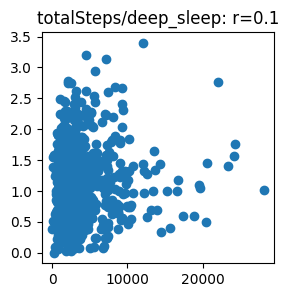

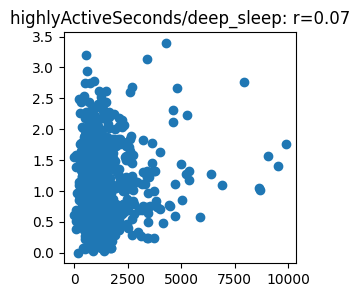

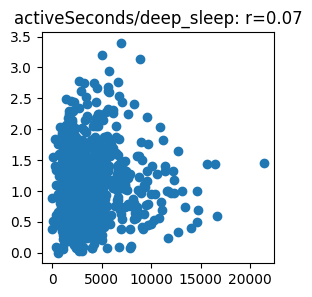

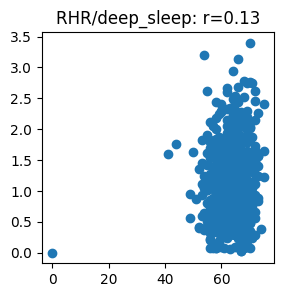

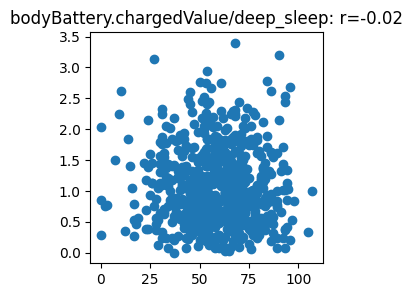

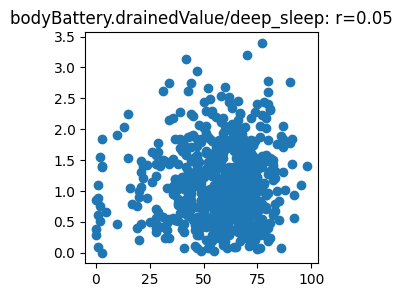

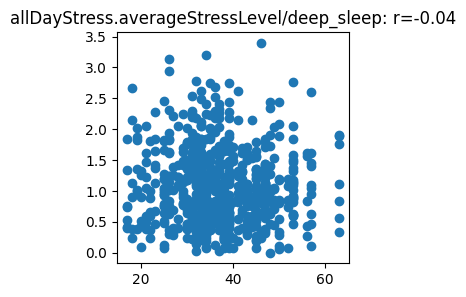

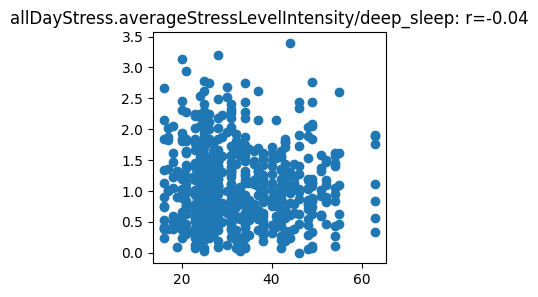

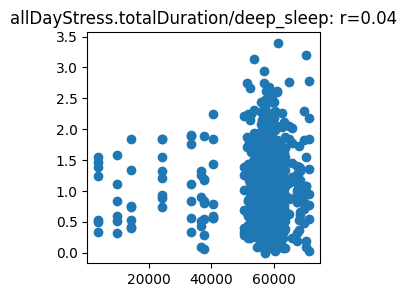

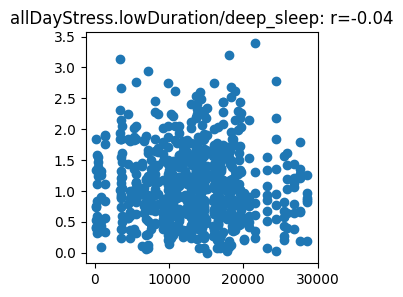

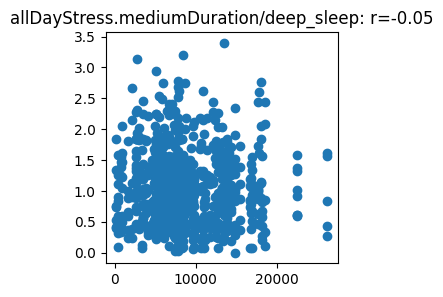

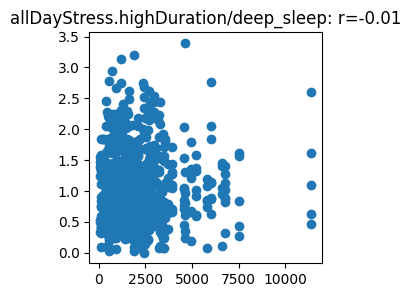

In [5]:
# Выводим графики и коэф.корреляции для глубоко сна

for i in data_cleaned[['totalKilocalories', 'activeKilocalories', 'totalSteps',
       'highlyActiveSeconds', 'activeSeconds', 'RHR',
       'bodyBattery.chargedValue', 'bodyBattery.drainedValue',
       'allDayStress.averageStressLevel',
       'allDayStress.averageStressLevelIntensity',
       'allDayStress.totalDuration', 'allDayStress.lowDuration',
       'allDayStress.mediumDuration', 'allDayStress.highDuration']]:
    plt.figure(figsize=(3, 3))
    plt.scatter(data_cleaned[i], data_cleaned['deep_offset']/3600)
    r = sts.pearsonr(data_cleaned[i], data_cleaned['deep_offset'])
    plt.title(f'{i}/deep_sleep: r={round(r[0],2)}')
    plt.show()

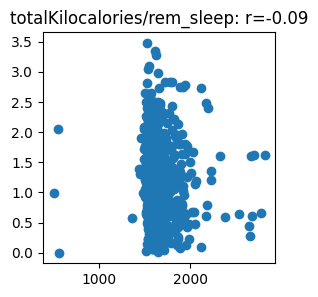

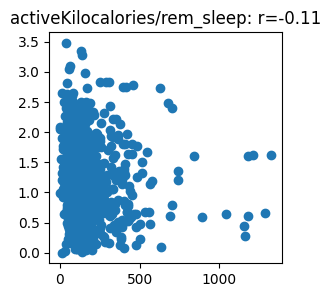

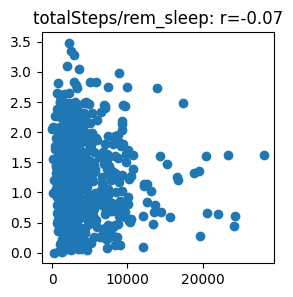

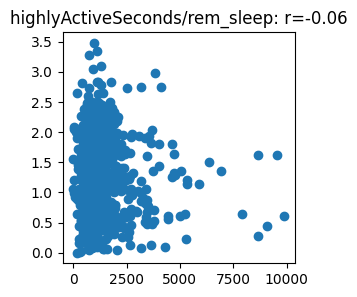

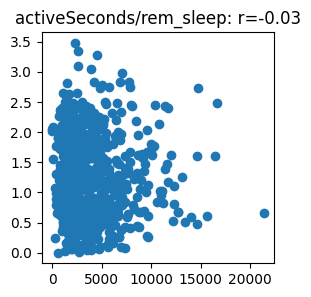

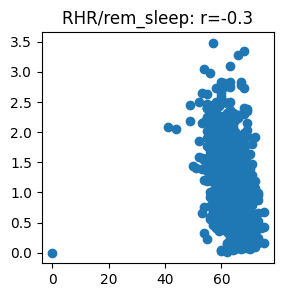

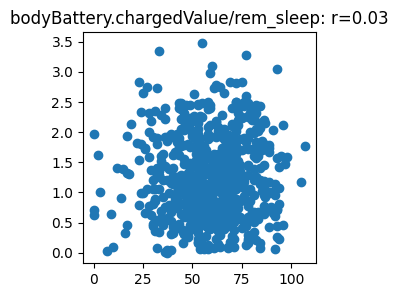

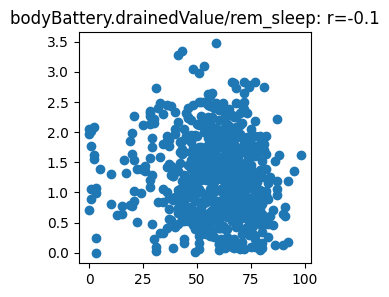

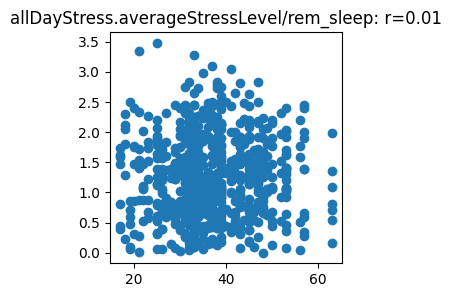

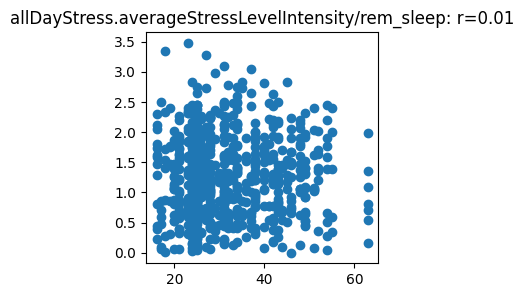

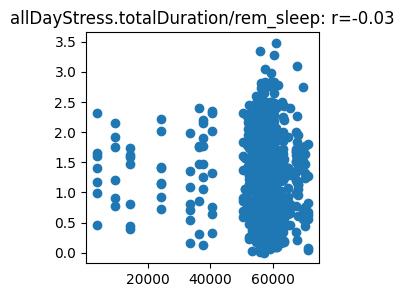

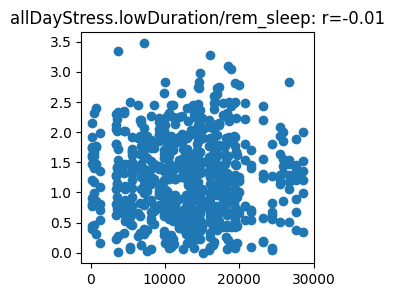

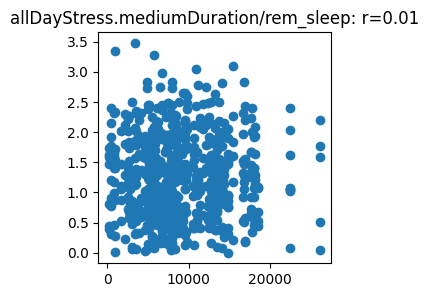

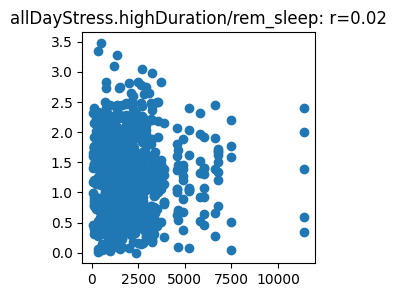

In [6]:
# Выводим графики и коэф.корреляции для REM сна

for i in data_cleaned[['totalKilocalories', 'activeKilocalories', 'totalSteps',
       'highlyActiveSeconds', 'activeSeconds', 'RHR',
       'bodyBattery.chargedValue', 'bodyBattery.drainedValue',
       'allDayStress.averageStressLevel',
       'allDayStress.averageStressLevelIntensity',
       'allDayStress.totalDuration', 'allDayStress.lowDuration',
       'allDayStress.mediumDuration', 'allDayStress.highDuration']]:
    plt.figure(figsize=(3, 3))
    plt.scatter(data_cleaned[i], data_cleaned['rem_offset']/3600)
    r = sts.pearsonr(data_cleaned[i], data_cleaned['rem_offset'])
    plt.title(f'{i}/rem_sleep: r={round(r[0],2)}')
    plt.show()